In [1]:
library(tidyverse)
employees <- read_csv("../_build/data/employee_data.csv")
employees$Salary <- parse_number(employees$Salary)
employees$Start_Date <- parse_date(employees$Start_Date, format = "%m/%d/%Y")
degreeLevels <- c("High School", "Associate's", "Bachelor's", "Master's", "Ph.D")
employees$Degree <- parse_factor(employees$Degree, levels = degreeLevels, ordered = TRUE)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --


v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  


-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Parsed with column specification:
cols(
  ID = col_double(),
  Name = col_character(),
  Gender = col_character(),
  Age = col_double(),
  Rating = col_double(),
  Degree = col_character(),
  Start_Date = col_character(),
  Retired = col_logical(),
  Division = col_character(),
  Salary = col_character()
)


# Multiple Linear Regression

In **multiple linear regression** we desire to model a dependent $Y$ as a linear function of more than one explanatory variable. The assumed underlying relationship is:

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_kX_k + \epsilon$$

The fundamental ideas of regression introduced for the simple linear regression model hold for multiple regression as well. In short, for multiple regression:

+ Estimation is done by the method of least squares.
+ Confidence intervals can be obtained for each coefficient.
+ Hypothesis tests can be performed for each coefficient.
+ $R_a^2$ is a measure of how much variation in the $y$ variable the $x$ variables (together) explain.
+ The errors are calculated as observed values minus predicted values.
+ The noise in the system is assumed to be normally distributed, with a fixed variance that does not vary with $x$.
+ $s_e$ is a measure of how accurate the predictions are.

The only main difference is in interpreting the estimated regression coefficients. In Latin the term *ceteris paribus* means “everything else (*i.e.*, all other conditions) staying the same.”  We apply this concept when we interpret regression coefficients in a multiple regression. For example, how do we interpret $b_2$? We would like to say that for a one unit change in $x_2$, $y$ changes by $b_2$ (on average). But what happens to all the other variables in the model when we change $x_2$? To interpret the coefficient, we assume they remain constant. So we interpret $b_k$ by saying that if $x_k$ changes by one unit, then $y$ changes by $b_k$ on average *assuming all other variables in the model remain constant.*

As an example, let's now model `Salary` from the `employees` data set as a function of both `Age` and `Rating`. We again use the `lm()` function, but now specify multiple explanatory variables in the regression formula:

```{admonition} Syntax
`lm(y ~ x1 + x2 + ... + xp, data = df)`
+ *Required arguments*
  - `y`: The name of the dependent ($Y$) variable.
  - `x1`, `x2`, ... `xp`: The name of the first, second, and $pth$ independent variables.
  - `data`: The name of the data frame with the `y`, `x1`, `x2`, and `xp` variables.
```

In [2]:
modelAgeRating <- lm(Salary ~ Age + Rating, data=employees)
summary(modelAgeRating)


Call:
lm(formula = Salary ~ Age + Rating, data = employees)

Residuals:
   Min     1Q Median     3Q    Max 
-91521 -21560    885  22729  90085 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30505.51    5453.65   5.594 2.94e-08 ***
Age          1966.05      92.83  21.180  < 2e-16 ***
Rating       5604.08     530.60  10.562  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 30830 on 917 degrees of freedom
  (80 observations deleted due to missingness)
Multiple R-squared:  0.3916,	Adjusted R-squared:  0.3902 
F-statistic: 295.1 on 2 and 917 DF,  p-value: < 2.2e-16


Based on this output, our new estimated regression equation is:

$$predicted \;salary = \hat{y} = \$30,505.51 + \$1,966.05(Age)  + \$5,604.08(Rating)$$

We interpret the regression coefficients as follows:

+ On average, employees who are zero years old and have a rating of zero make \$30,505.51. Clearly the intercept is not interpretable by itself but helps to anchor the line and give a baseline value for predictions.
+ On average, salary goes up by \$1,966.05 for each additional year of age, assuming all other variables in the model are kept constant.
+ On average, salary goes up by \$5,604.08 for each additional point in an employee's rating, assuming all other variables in the model are kept constant.

## The overall $F$ test

If we look at the last line of the regression output above we see something called the **F-statistic**. This is an overall goodness of fit test that is used in multiple regression. This statistic is testing the null hypothesis that no explanatory variables are needed in the model. If we reject this test by having a small p-value (traditionally less than 0.05) we may conclude that we need at least one explanatory variable in the model. However, we are not told which one we need. Although this seems like a silly test, it is one that is very robust to model misspecification so we will usually look at it first when doing model building to make sure there is some explanatory power in the model.

## Basic Diagnostic Plots

As we did with simple linear regression, we can examine diagnostic plots to see if the regression assumptions hold. The residuals versus fitted plot below has essentially a random scatter, indicating that there is no need to look for nonlinear relationships between the $X$ variables and $Y$.

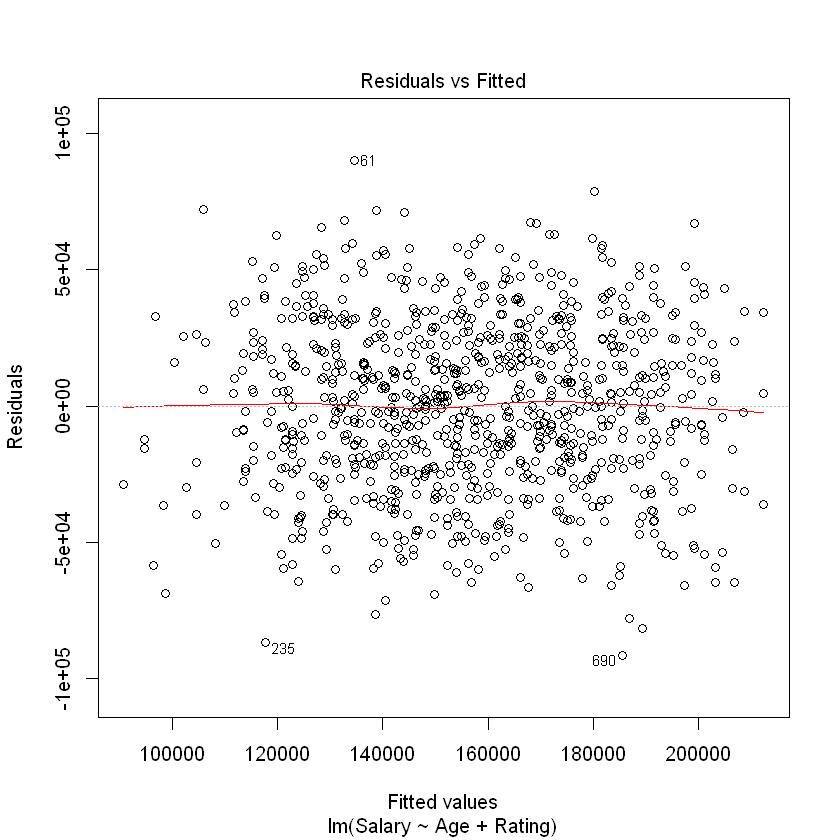

In [3]:
plot(modelAgeRating, which = 1)

Additionally, a histogram and qq-plot of the residuals indicates that our new model errors are approximately normal.

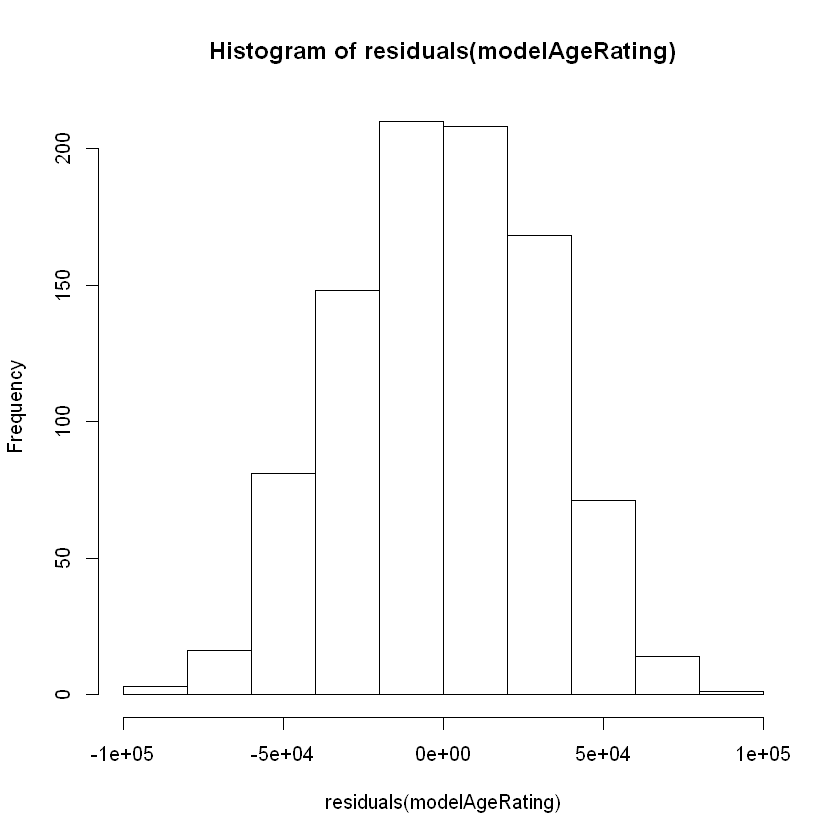

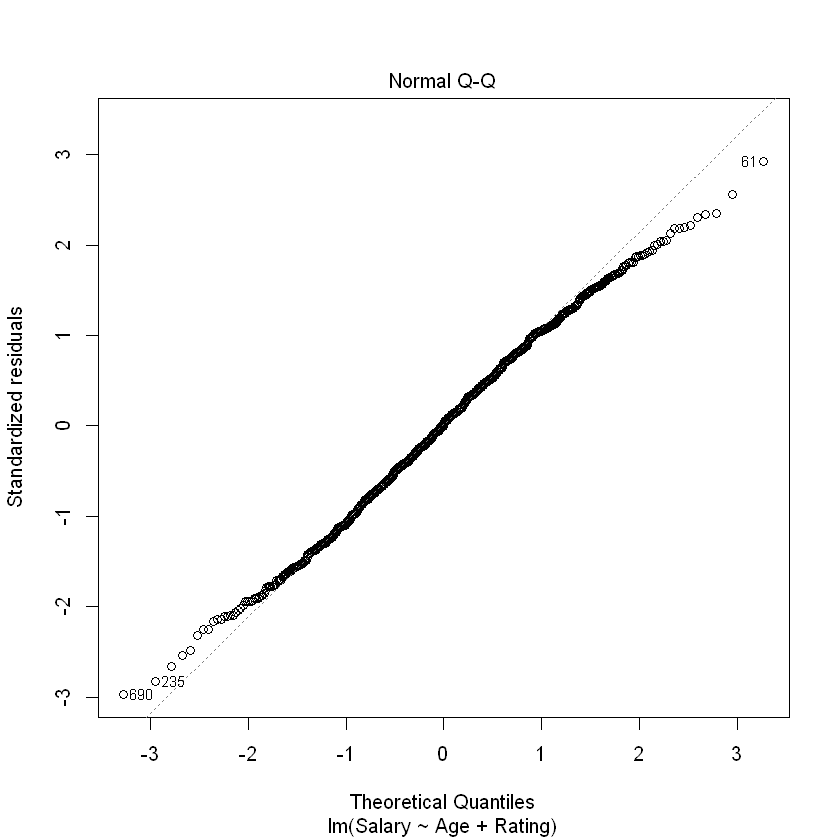

In [4]:
hist(residuals(modelAgeRating))
plot(modelAgeRating, which = 2)